In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#устраним ошибки со шрифтами
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import *
from sklearn.metrics import *
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
#a = train[[ 'MSSubClass', 'LotFrontage', 'LotArea',  'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
#print(a.corr())


In [5]:
y_train = train['SalePrice']

In [6]:


#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
#test[cat_feat] = test[cat_feat].fillna('nan')

#отфильтруем непрерывные признаки
cat_feat = list(test.dtypes[test.dtypes == object].index)
num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]

cat_nunique = train[cat_feat].nunique()
#print(cat_nunique)
cat_feat = list(cat_nunique[cat_nunique < 30].index)

In [4]:
a = []
for columns in train:
    a += [train[columns].corr(train['SalePrice'], method= 'spearman')]
b = ["{:15} {:.5f}".format(x, y) for y, x in zip(a,train.columns)]

In [5]:
b

['Id              -0.01855',
 'MSSubClass      0.00719',
 'MSZoning        -0.33491',
 'LotFrontage     0.40908',
 'LotArea         0.45646',
 'Street          0.04581',
 'Alley           0.60121',
 'LotShape        -0.30592',
 'LandContour     -0.01023',
 'Utilities       -0.01671',
 'LotConfig       -0.07423',
 'LandSlope       0.05031',
 'Neighborhood    0.16561',
 'Condition1      0.18666',
 'Condition2      0.06163',
 'BldgType        -0.11993',
 'HouseStyle      0.25367',
 'OverallQual     0.80983',
 'OverallCond     -0.12932',
 'YearBuilt       0.65268',
 'YearRemodAdd    0.57116',
 'RoofStyle       0.14016',
 'RoofMatl        0.08385',
 'Exterior1st     0.06789',
 'Exterior2nd     0.07026',
 'MasVnrType      -0.07775',
 'MasVnrArea      0.42131',
 'ExterQual       -0.63332',
 'ExterCond       0.12826',
 'Foundation      0.49193',
 'BsmtQual        -0.58132',
 'BsmtCond        0.04094',
 'BsmtExposure    -0.27949',
 'BsmtFinType1    -0.05052',
 'BsmtFinSF1      0.30187',
 'BsmtF

In [7]:
x = pd.DataFrame(a, train.columns).reset_index()
x.columns = ['feature', 'corr']

In [10]:
x

,feature,corr
0,Id,-0.018546
1,MSSubClass,0.007192
2,MSZoning,-0.334909
3,LotFrontage,0.409076
4,LotArea,0.456461
5,Street,0.045814
6,Alley,0.601206
7,LotShape,-0.305923
8,LandContour,-0.010234
9,Utilities,-0.016710


In [22]:
feature = []
for i in range(81):
    if abs(x['corr'][i]) < 0.15:
        feature += [x.feature[i]]
feature.extend(['Alley', 'PoolQC', 'Fence'])

In [23]:
feature

['Id',
 'MSSubClass',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition2',
 'BldgType',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'LowQualFinSF',
 'BsmtHalfBath',
 'Functional',
 'FireplaceQu',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'Alley',
 'PoolQC',
 'Fence']

In [24]:
train.drop(feature, axis=1, inplace=True)

In [31]:
train.shape

(1460, 45)

In [27]:
y = train['SalePrice']

In [28]:
del train['SalePrice']

In [29]:
test.drop(feature, axis=1, inplace=True)

In [30]:
test.shape

(1459, 45)

In [36]:
train_dummies = pd.get_dummies(train)

In [39]:
train_dummies.shape

(1460, 147)

In [40]:
test_dummies = pd.get_dummies(test)

In [42]:
test_dummies.shape

(1459, 144)

In [46]:
dummy_cols = list(set(train_dummies) & set(test_dummies))
dummy_train = train_dummies[dummy_cols]
dummy_test = test_dummies[dummy_cols]

X_train = dummy_train.fillna(-999)
X_test = dummy_test.fillna(-999)

In [56]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(dummy_train)
X_train_imputed = imputer.transform(dummy_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=dummy_train.columns.values.tolist())

In [57]:
imputer.fit(dummy_test)
X_test_imputed = imputer.transform(dummy_test)
X_test_imputed = pd.DataFrame(X_train_imputed, columns=dummy_test.columns.values.tolist())

In [64]:
X_train, X_test, y_train, Y_test = train_test_split( X_train_imputed, y, test_size = 0.3, random_state = 0 )

In [60]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [61]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)

In [ ]:
results = cross_val_score(clf_rf, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

In [70]:
X_train.shape

(1022, 144)

In [101]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1000, max_features=144, max_leaf_nodes=10)
clf.fit(X_train, y_train)

#plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
#plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
#''

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1000,
            max_features=144, max_leaf_nodes=10, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [102]:
results = cross_val_score(clf, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 11.19%


In [105]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=1000, min_samples_leaf=1,max_leaf_nodes=10 , max_features=144, n_jobs=-1)
clf_rf.fit(X_train, Y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1000, max_features=144, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
results_rand_for = cross_val_score(clf_rf, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_rand_for.mean()*100))

CV accuracy score: 10.58%


In [116]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(n_estimators=1000, base_estimator=clf, n_jobs=-1)
bag_clf.fit(X_train, y_train)
results_bag_clf = cross_val_score(bag_clf, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_bag_clf.mean()*100))


CV accuracy score: 10.68%


In [118]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [119]:
knn1 = KNeighborsRegressor(n_neighbors=3)
knn1.fit(X_train, y_train)
results_knn1 = cross_val_score(knn1, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_knn1.mean()*100))

CV accuracy score: -1939.13%


In [ ]:
y_pred_rf_train_knn1 = knn1.predict_proba(X_train)[:, 1]

In [124]:
knn2 = KNeighborsRegressor(n_neighbors=300)
knn2.fit(X_train, y_train)
results_knn2 = cross_val_score(knn2, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_knn2.mean()*100))

CV accuracy score: -294.46%


In [ ]:
y_pred_rf_train = clf_rf.predict_proba(X_train)[:, 1]

In [128]:
rg1 = Ridge(alpha=1)
rg1.fit(X_train, y_train)
results_rg1 = cross_val_score(rg1, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_rg1.mean()*100))

CV accuracy score: -104.81%


In [ ]:
y_pred_rf_train = clf_rf.predict_proba(X_train)[:, 1]

In [129]:
rg2 = Ridge(alpha=100.1)
rg2.fit(X_train, y_train)
results_rg2 = cross_val_score(rg2, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_rg2.mean()*100))

CV accuracy score: -433.61%


In [130]:
rg3 = Ridge(alpha=0.001)
rg3.fit(X_train, y_train)
results_rg3 = cross_val_score(rg3, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_rg3.mean()*100))

CV accuracy score: -110.06%


In [ ]:
clf_lr = LogisticRegression(penalty='l1', C=1)
clf_lr.fit(X_train, y_train)
results_clf_lr = cross_val_score(clf_lr, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_clf_lr.mean()*100))

In [ ]:
clf_lr1 = LogisticRegression( C=100)
clf_lr1.fit(X_train, y_train)
results_clf_lr1 = cross_val_score(clf_lr1, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_clf_lr1.mean()*100))

In [ ]:
clf_lr3 = LogisticRegression(penalty='l1', C=0.001)
clf_lr3.fit(X_train, y_train)
results_clf_lr3 = cross_val_score(clf_lr3, X_train, y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results_clf_lr3.mean()*100))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_actual, y_predicted))

In [32]:
cat_feat = list(train.dtypes[train.dtypes == object].index)

In [33]:
cat_nunique = train[cat_feat].nunique()
cat_feat = list(cat_nunique[cat_nunique < 10].index)

In [34]:
len(cat_feat)

19

In [18]:
train['Qual_ext_kit'] = train['ExterQual'] + train['KitchenQual']


In [19]:
test['Qual_ext_kit'] = test['ExterQual'] + test['KitchenQual']

In [35]:
num_feat = [f for f in train if f not in (cat_feat + ['SalePrice'])]

In [21]:
cat_feat.remove('ExterQual')
cat_feat.remove('KitchenQual')

In [22]:
cat_feat.append('Qual_ext_kit')

In [23]:
le = preprocessing.LabelEncoder()
le.fit( train['Qual_ext_kit'] )
le.classes_
le.transform( [ 'ExEx', 'ExGd', 'ExTA', 'FaFa', 'FaTA', 'GdEx', 'GdGd', 'GdTA',
       'TAEx', 'TAFa', 'TAGd', 'TATA' ] )
q = pd.Series( le.transform( train['Qual_ext_kit'] ) )
X_train = pd.concat([train, q], axis=1)

In [24]:
test

,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleCondition,Qual_ext_kit
0,RH,80.0,11622,Reg,1Story,5,1961,1961,0.0,TA,...,1961.0,Unf,1.0,730.0,Y,140,0,0,Normal,TATA
1,RL,81.0,14267,IR1,1Story,6,1958,1958,108.0,TA,...,1958.0,Unf,1.0,312.0,Y,393,36,0,Normal,TAGd
2,RL,74.0,13830,IR1,2Story,5,1997,1998,0.0,TA,...,1997.0,Fin,2.0,482.0,Y,212,34,0,Normal,TATA
3,RL,78.0,9978,IR1,2Story,6,1998,1998,20.0,TA,...,1998.0,Fin,2.0,470.0,Y,360,36,0,Normal,TAGd
4,RL,43.0,5005,IR1,1Story,8,1992,1992,0.0,Gd,...,1992.0,RFn,2.0,506.0,Y,0,82,0,Normal,GdGd
5,RL,75.0,10000,IR1,2Story,6,1993,1994,0.0,TA,...,1993.0,Fin,2.0,440.0,Y,157,84,0,Normal,TATA
6,RL,NaN,7980,IR1,1Story,6,1992,2007,0.0,TA,...,1992.0,Fin,2.0,420.0,Y,483,21,0,Normal,TATA
7,RL,63.0,8402,IR1,2Story,6,1998,1998,0.0,TA,...,1998.0,Fin,2.0,393.0,Y,0,75,0,Normal,TATA
8,RL,85.0,10176,Reg,1Story,7,1990,1990,0.0,TA,...,1990.0,Unf,2.0,506.0,Y,192,0,0,Normal,TAGd
9,RL,70.0,8400,Reg,1Story,4,1970,1970,0.0,TA,...,1970.0,Fin,2.0,525.0,Y,240,0,0,Normal,TATA


lep = preprocessing.LabelEncoder()
lep.fit( test['Qual_ext_kit'] )
lep.classes_
lep.transform( [ 'ExEx', 'ExGd', 'ExTA', 'FaFa', 'FaTA', 'GdEx', 'GdGd', 'GdTA',
       'TAEx', 'TAFa', 'TAGd', 'TATA' ] )
q = pd.Series( le.transform( test['Qual_ext_kit'] ) )
X_test = pd.concat([test, q], axis=1)

In [26]:
train.head()

,MSZoning,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,SaleCondition,SalePrice,Qual_ext_kit
0,RL,65.0,8450,Reg,2Story,7,2003,2003,196.0,Gd,...,RFn,2,548,Y,0,61,0,Normal,208500,GdGd
1,RL,80.0,9600,Reg,1Story,6,1976,1976,0.0,TA,...,RFn,2,460,Y,298,0,0,Normal,181500,TATA
2,RL,68.0,11250,IR1,2Story,7,2001,2002,162.0,Gd,...,RFn,2,608,Y,0,42,0,Normal,223500,GdGd
3,RL,60.0,9550,IR1,2Story,7,1915,1970,0.0,TA,...,Unf,3,642,Y,0,35,272,Abnorml,140000,TAGd
4,RL,84.0,14260,IR1,2Story,8,2000,2000,350.0,Gd,...,RFn,3,836,Y,192,84,0,Normal,250000,GdGd


In [30]:
num_feat.append('Qual_ext_kit')
#cat_feat.remove('Qual_ext_kit')

In [31]:
print(cat_feat)
#print(num_feat)

['MSZoning', 'LotShape', 'HouseStyle', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition']


In [32]:
for i in range(len(cat_feat)):
    print(cat_feat[i], X_train[cat_feat[i]].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir ['Y' 'N']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
PavedDrive ['Y' 'N' 'P']
SaleCondition ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


Ex 10
Gd 8
TA 6
Fa 4
Po 2
nan 5

ExterQual BsmtQual  HeatingQC KitchenQual

In [33]:
def quality(row):
    if row['KitchenQual'] == 'Ex':
        return int(10)
    if row['KitchenQual'] == 'Gd':
        return int(8)
    if row['KitchenQual'] == 'TA':
        return int(6)
    if row['KitchenQual'] == 'Fa':
        return int(4)
    if row['KitchenQual'] == 'Po':
        return int(2)
    if row['KitchenQual'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Kitchen_Qual'] = train.apply( quality, axis = 1 )

In [34]:
def quality1(row):
    if row['HeatingQC'] == 'Ex':
        return int(10)
    if row['HeatingQC'] == 'Gd':
        return int(8)
    if row['HeatingQC'] == 'TA':
        return int(6)
    if row['HeatingQC'] == 'Fa':
        return int(4)
    if row['HeatingQC'] == 'Po':
        return int(2)
    if row['HeatingQC'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Heating_QC'] = train.apply( quality1, axis = 1 )

In [35]:
def quality2(row):
    if row['BsmtQual'] == 'Ex':
        return int(10)
    if row['BsmtQual'] == 'Gd':
        return int(8)
    if row['BsmtQual'] == 'TA':
        return int(6)
    if row['BsmtQual'] == 'Fa':
        return int(4)
    if row['BsmtQual'] == 'Po':
        return int(2)
    if row['BsmtQual'] == 'nan':
        return int(5)
    else:
        return int(5)
train['Bsmt_Qual'] = train.apply( quality2, axis = 1 )

In [36]:
def quality3(row):
    if row['ExterQual'] == 'Ex':
        return int(10)
    if row['ExterQual'] == 'Gd':
        return int(8)
    if row['ExterQual'] == 'TA':
        return int(6)
    if row['ExterQual'] == 'Fa':
        return int(4)
    if row['ExterQual'] == 'Po':
        return int(2)
    if row['ExterQual'] == 'nan':
        return int(6)
    else:
        return int(5)
train['External_Qual'] = train.apply( quality3, axis = 1 )

In [37]:
test['Kitchen_Qual'] = test.apply( quality, axis = 1 )
test['Heating_QC'] = test.apply( quality1, axis = 1 )
test['Bsmt_Qual'] = test.apply( quality2, axis = 1 )
test['External_Qual'] = test.apply( quality3, axis = 1 )

In [38]:
train['Kitchen_Qual'] = train.apply( quality, axis = 1 )
train['Heating_QC'] = train.apply( quality1, axis = 1 )
train['Bsmt_Qual'] = train.apply( quality2, axis = 1 )
train['External_Qual'] = train.apply( quality3, axis = 1 )

In [39]:
train['quality'] = (train['Kitchen_Qual']+ train['Heating_QC'] + train['External_Qual']+ train['Bsmt_Qual'])/4

In [40]:
train.drop(['Kitchen_Qual', 'Heating_QC', 'External_Qual', 'Bsmt_Qual', 'ExterQual' ,'BsmtQual' , 'HeatingQC', 'KitchenQual'], axis=1, inplace=True)

In [41]:
train.drop(['Qual_ext_kit'], axis=1, inplace=True)

In [42]:
cat_feat = list(train.dtypes[train.dtypes == object].index)
num_feat = [f for f in train if f not in (cat_feat + ['ID', 'Saleprice'])]

In [43]:
test['quality'] = (test['Kitchen_Qual']+ test['Heating_QC'] + test['External_Qual']+ test['Bsmt_Qual'])/4
test.drop(['Kitchen_Qual', 'Heating_QC', 'External_Qual', 'Bsmt_Qual', 'ExterQual' ,'BsmtQual' , 'HeatingQC', 'KitchenQual', 'Qual_ext_kit'], axis=1, inplace=True)

In [44]:
test.SaleCondition.unique()

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [45]:
cat_feat

['MSZoning',
 'LotShape',
 'HouseStyle',
 'Foundation',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition']

In [46]:
num_feat

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'SalePrice',
 'quality']

In [47]:
train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleCondition',
       'SalePrice', 'quality'],
      dtype='object')

In [48]:
a = []
for columns in train:
    a += [train[columns].corr(train['SalePrice'], method= 'spearman')]
b = ["{:15} {:.5f}".format(x, y) for y, x in zip(a,train.columns)]
b

['MSZoning        -0.33491',
 'LotFrontage     0.40908',
 'LotArea         0.45646',
 'LotShape        -0.30592',
 'HouseStyle      0.25367',
 'OverallQual     0.80983',
 'YearBuilt       0.65268',
 'YearRemodAdd    0.57116',
 'MasVnrArea      0.42131',
 'Foundation      0.49193',
 'BsmtExposure    -0.27949',
 'BsmtFinSF1      0.30187',
 'TotalBsmtSF     0.60273',
 'CentralAir      0.31329',
 'Electrical      0.29553',
 '1stFlrSF        0.57541',
 '2ndFlrSF        0.29360',
 'GrLivArea       0.73131',
 'BsmtFullBath    0.22512',
 'FullBath        0.63596',
 'HalfBath        0.34301',
 'BedroomAbvGr    0.23491',
 'TotRmsAbvGrd    0.53259',
 'Fireplaces      0.51925',
 'GarageType      -0.45058',
 'GarageYrBlt     0.59379',
 'GarageFinish    -0.59226',
 'GarageCars      0.69071',
 'GarageArea      0.64938',
 'PavedDrive      0.28060',
 'WoodDeckSF      0.35380',
 'OpenPorchSF     0.47756',
 'EnclosedPorch   -0.21839',
 'SaleCondition   0.31967',
 'SalePrice       1.00000',
 'quality     

In [49]:
train.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [50]:
train.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [51]:
train.GarageCars.unique()

array([2, 3, 1, 0, 4])

In [52]:
train.GarageArea.unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

In [53]:
train.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [56]:
data = []

for genre in train.GarageFinish.unique():
    data.append(
        go.Box(y=train[train.GarageFinish==genre].GarageArea, 
               name=genre)
    )
iplot(data, show_link = False)

In [55]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [57]:
#dataNew = train.iloc['GarageCars', 'GarageFinish', 'GarageType', 'GarageArea' ]

#df = train.ix ( columns = ['GarageCars', 'GarageFinish', 'GarageType', 'GarageArea'])
www = train.loc[:,['GarageCars', 'GarageFinish', 'GarageType', 'GarageArea']]

In [58]:
www.corr()

,GarageCars,GarageArea
GarageCars,1.000000,0.882475
GarageArea,0.882475,1.000000


In [59]:
qwe = []
for columns in www:
    qwe += [train[columns].corr(www['GarageArea'], method= 'spearman')]
bfg = ["{:15} {:.5f}".format(x, y) for y, x in zip(qwe,www.columns)]
bfg

['GarageCars      0.85332',
 'GarageFinish    -0.36926',
 'GarageType      -0.23154',
 'GarageArea      1.00000']

In [60]:
train['Garage_Type_Fin'] = train['GarageFinish'] + train['GarageType']
test['Garage_Type_Fin'] = test['GarageFinish'] + test['GarageType']
train.drop(['GarageFinish', 'GarageType'], axis=1, inplace=True)
test.drop(['GarageFinish', 'GarageType'], axis=1, inplace=True)

In [61]:
train.Garage_Type_Fin.nunique()

16

In [63]:
#test.drop(['Id', 'MSSubClass' ,'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF' ,'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)



In [64]:
test.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleCondition', 'quality', 'Garage_Type_Fin'],
      dtype='object')

In [65]:
cat_feat = list(test.dtypes[test.dtypes == object].index)
num_feat = [f for f in test if f not in (cat_feat + ['ID', 'Saleprice'])]

cat_nunique = train[cat_feat].nunique()
#print(cat_nunique)
cat_feat = list(cat_nunique[cat_nunique < 30].index)

In [66]:
train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleCondition', 'SalePrice', 'quality',
       'Garage_Type_Fin'],
      dtype='object')

In [67]:
test.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleCondition', 'quality', 'Garage_Type_Fin'],
      dtype='object')

In [68]:
dummy_train = pd.get_dummies(train, columns=cat_feat)
dummy_test = pd.get_dummies(test, columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))
# вот эта строка - если есть данные в тесте но нет в трейне

X_train = dummy_train[dummy_cols]
X_test = dummy_test[dummy_cols]


X_train = pd.concat([train[num_feat], dummy_train], axis=1)

X_test = pd.concat([test[num_feat], dummy_test], axis=1)
#-999 вместо пропущенные значения ставится

In [9]:
from sklearn.preprocessing import Imputer

In [11]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [14]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(train)
X_train_imputed = imputer.transform(train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=train.columns.values.tolist())

In [15]:
X_train = X_train_imputed

In [16]:
X_train_imputed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)
imputer.fit(X_test)
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns.values.tolist())
X_train = X_train_imputed

In [74]:
Y = X_train_imputed['SalePrice']

In [24]:
X_train.drop('SalePrice', axis=1, inplace=True)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split( X_train_imputed, y_train, test_size = 0.3, random_state = 0 )

In [26]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,65.0,60.0,70.049958,9375.0,7.0,5.0,1997.0,1998.0,573.0,739.0,...,645.0,576.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
682,683.0,120.0,70.049958,2887.0,6.0,5.0,1996.0,1997.0,0.0,1003.0,...,431.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
960,961.0,20.0,50.000000,7207.0,5.0,7.0,1958.0,2008.0,0.0,696.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1384,1385.0,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,...,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
1100,1101.0,30.0,60.000000,8400.0,2.0,5.0,1920.0,1950.0,0.0,290.0,...,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_imputed = pd.DataFrame(X_train_scaler, columns=X_train.columns.values.tolist())
X_train = X_train_imputed

X_test_scaler = scaler.fit(X_test).transform(X_test)
X_test_imputed = pd.DataFrame(X_test_scaler, columns=X_test.columns.values.tolist())
X_test = X_test_imputed

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(n_estimators=20, base_estimator=clf_tree, n_jobs=-1)
bag_clf.fit(X_train, Y_train)

BaggingRegressor(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [34]:
y_pred_test = bag_clf.predict(X_test)[:, 1]
y_pred_train = bag_clf.predict(X_train)[:, 1]

IndexError: too many indices for array

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=20, max_features=0.8, n_jobs=-1)

clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
y_pred_rf_test = clf_rf.predict_proba(X_test)
y_pred_rf_train = clf_rf.predict_proba(X_train)

In [37]:
imp = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False)
#imp.sort_values(ascending=False).iloc[:20].plot(kind='barh') # график 

GrLivArea        0.090112
GarageArea       0.079462
LotArea          0.074880
TotalBsmtSF      0.069401
1stFlrSF         0.064632
BsmtUnfSF        0.057151
YearBuilt        0.050260
BsmtFinSF1       0.049737
LotFrontage      0.049306
Id               0.044831
YearRemodAdd     0.037022
WoodDeckSF       0.036177
GarageYrBlt      0.036030
OverallQual      0.032117
2ndFlrSF         0.029389
OpenPorchSF      0.029059
MasVnrArea       0.027318
MoSold           0.026310
FullBath         0.019268
YrSold           0.018569
Fireplaces       0.010469
TotRmsAbvGrd     0.010151
GarageCars       0.009191
MSSubClass       0.009139
BedroomAbvGr     0.008199
OverallCond      0.006627
BsmtFinSF2       0.006461
EnclosedPorch    0.005633
ScreenPorch      0.004202
HalfBath         0.004144
BsmtFullBath     0.002832
KitchenAbvGr     0.001922
3SsnPorch        0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

In [78]:
from sklearn.preprocessing import StandardScaler

train_median = train[num_feat].median()

X_train_lin = pd.concat([train[num_feat].fillna(train_median),
                     train[num_feat + cat_feat].isnull().astype(np.int8).add_suffix('_NaN'),
                     dummy_train], axis=1)

X_test_lin = pd.concat([test[num_feat].fillna(train_median),
                     test[num_feat + cat_feat].isnull().astype(np.int8).add_suffix('_NaN'),
                     dummy_test], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_lin[num_feat])

X_train_lin[num_feat] = scaler.transform(X_train_lin[num_feat])
X_test_lin[num_feat] = scaler.transform(X_test_lin[num_feat])

In [38]:
clf_lr = LogisticRegression(penalty='l1', C=0.1)

clf_lr.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
clf_lr = LogisticRegression(penalty='l1', C=0.1)

clf_lr.fit(X_train, Y_train)

y_pred_lin_test = clf_lr.predict_proba(X_test)[:, 1]
y_pred_lin_train = clf_lr.predict_proba(X_train)[:, 1]

clf_lr.score(X_train, Y_train)

In [54]:
clf_lr.score(X_train, Y_train)

0.021526418786692758

In [57]:
y = train['SalePrice']
del train['SalePrice']

In [58]:
#train.info()

In [59]:
train.drop([ 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 
       'HouseStyle', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',  
       'HeatingQC', 'Electrical', '2ndFlrSF',
       'LowQualFinSF',  'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
        'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Fence'], axis=1, inplace=True)

In [60]:
#train.columns

In [61]:
#train.head()

In [62]:
 #train.info()

In [63]:
train_dummies = pd.get_dummies(train, columns=['MSZoning',
 'LotShape',
 'HouseStyle',
 'Foundation',
 'BsmtExposure',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition'])



ValueError: labels ['HouseStyle' 'BsmtExposure' 'Electrical' 'GarageType' 'GarageFinish'
 'PavedDrive' 'SaleCondition'] not contained in axis

In [64]:
train_dummies.drop(['Heating_OthW', 'Heating_Floor', 'Utilities_NoSeWa' ], axis=1, inplace=True)

NameError: name 'train_dummies' is not defined

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(train_dummies, y_train, test_size = 0.3, random_state = 0)

NameError: name 'train_dummies' is not defined

In [66]:
X_train.dtypes

Id               float64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
YrSold           float64
dtype: object

In [67]:
X_t

NameError: name 'X_t' is not defined

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [86]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [72]:
from sklearn.linear_model import LinearRegression

In [87]:
regression = LinearRegression()

In [88]:
regression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
y_pred = regression.predict(X_test)

In [90]:
["{:15} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_,train.columns))]

['Fireplaces      -136216942825617424.000',
 'CentralAir      -120892094978605456.000',
 'TotalBsmtSF     -120022572593795408.000',
 'Heating         -44095996363802024.000',
 'LotShape        -5586.167',
 'MSZoning        162.072',
 'GarageCars      2011.777',
 'Utilities       2533.814',
 'ExterQual       3566.270',
 'Neighborhood    4501.629',
 'OverallQual     4893.375',
 'Foundation      6134.128',
 'YearBuilt       7292.218',
 'BldgType        21380.806',
 'TotRmsAbvGrd    12573372583844152.000',
 'GrLivArea       98382039321329120.000',
 '1stFlrSF        114525590255128800.000',
 'FullBath        115968329825224976.000']

''

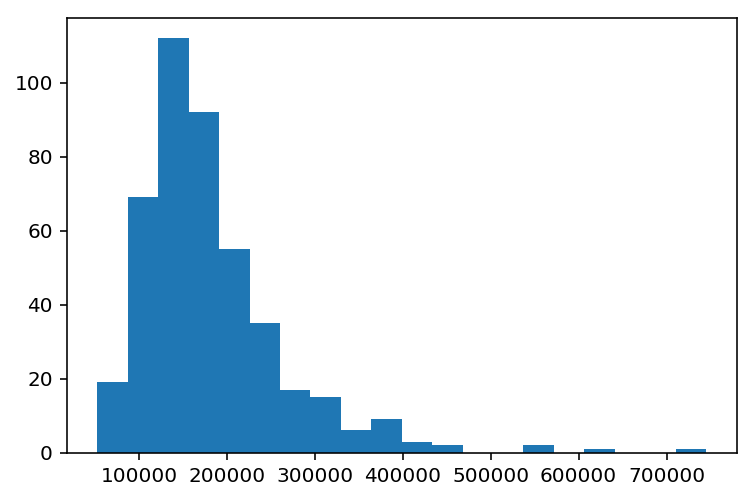

In [91]:
plt.hist(Y_test-y_pred_lin_test, bins=20)
''

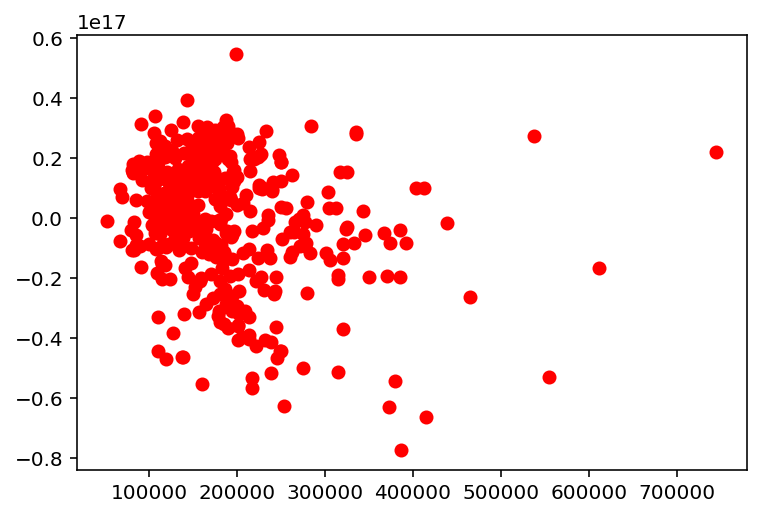

In [92]:
plt.plot(Y_test, y_pred, 'ro')

In [79]:
mse = np.mean((Y_test-y_pred)**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(Y_test-y_pred)))

mse 4.1622288755089945e+32
sqrt(mse) 2.0401541303315772e+16
avg_error 1.5909929616854292e+16


In [49]:
s4.to_csv( 'Predictions.csv', sep = ';', na_rep = '1', index = False )

NameError: name 's4' is not defined

In [ ]:
prediction = pd.read_csv('prediction.csv')

In [80]:
regression.score(X_train, Y_train)

0.8419640958079021

In [95]:
clf_lr = LogisticRegression(penalty='l1', C=1)

clf_lr.fit(X_train, Y_train)

y_pred_lin_test = clf_lr.predict_proba(X_test)[:, 1]
y_pred_lin_train = clf_lr.predict_proba(X_train)[:, 1]

clf_lr.score(X_train, Y_train)

0.363013698630137

In [96]:
clf_lr.score(X_test, Y_test)

0.0136986301369863

In [33]:
test.drop([ 'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 
       'HouseStyle', 'OverallCond', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',  
       'HeatingQC', 'Electrical', '2ndFlrSF',
       'LowQualFinSF',  'BsmtFullBath', 'BsmtHalfBath', 
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
        'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'Fence'], axis=1, inplace=True)

In [34]:
#test.info()

In [35]:
test['GarageCars'] = test['GarageCars'].fillna(0.0).astype(int)

test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0.0).astype(int)

In [36]:
test_dummies = pd.get_dummies(test, columns=['MSZoning' , 'LotShape' , 'Utilities',
'Neighborhood' , 'BldgType' , 'ExterQual' , 'Foundation' , 'Heating' , 'CentralAir'])
#X_test1 = test_dummies

In [37]:
from sklearn.preprocessing import Imputer

In [38]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [39]:
imputer.fit(X_test1)

NameError: name 'X_test1' is not defined

In [340]:
#X_train

In [341]:
#X_test1.info()

In [343]:
#X_test1_imputed = imputer.transform(X_test1)
#X_test1_imputed = pd.DataFrame(X_test1_imputed, columns=columns)

In [131]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [139]:
X_test.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [140]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)
X_test_scaled

NameError: name 'columns' is not defined

In [136]:
y_pred = regression.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [138]:
y_pred

NameError: name 'y_pred' is not defined

In [349]:
s4 = s3.reset_index()

In [350]:
s4.columns = ['Id' , 'SalePrice']

In [352]:
s4.to_csv( 'Predictions123.csv', sep = ',', na_rep = '0', index = False )

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
clf = DecisionTreeClassifier()

In [131]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [132]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [133]:
get_tree_dot_view(clf, list(X_train.columns), list(X_train.columns))

IndexError: list index out of range

''

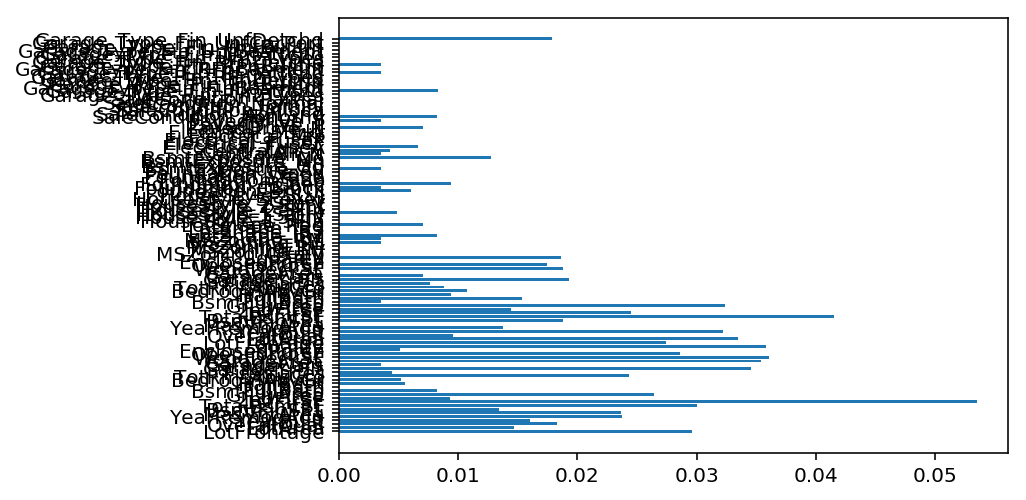

In [134]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, Y_train)

plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)
''

In [135]:
rcParams['figure.figsize'] = (20, 20)

In [ ]:
sns.pairplot(X_train, diag_kind="kde")